<a href="https://colab.research.google.com/github/strawndri/data-visualization/blob/main/Notebooks/Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importações

In [45]:
# Pandas
import pandas as pd

In [ ]:
# Seaborn
!pip install seaborn
import seaborn as sns

In [66]:
# Matplotlib
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 5))

# Extras

*   **Utilize `.get_figure()` para imprimir o gráfico sem o seu endereço de memória** 
*   **Para atribuir títulos aos gráficos, utilize: `.figure.suptitle()`**
*   **Para título, use `.set_title()`**
*   **Altera-se as labels do gráfico a partir da função `.set(xlabel='', ylabel='')`**
* **Caso queira salvar imagens dos gráficos, reserve em uma variável este com a função `.get_figure()`. Após isso, utilize a função `.savefig('endereco.png')`**

#Base de Dados

In [2]:
url = 'https://raw.githubusercontent.com/strawndri/data-visualization/main/Data/tips.csv'
dados = pd.read_csv(url)
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

##Colunas

In [3]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
renomear = {'total_bill': 'valor_da_conta',
            'tip': 'gorjeta',
            'dessert': 'sobremesa',
            'day': 'dia_da_semana',
            'time': 'horario',
            'size': 'total_pessoas'}

In [5]:
gorjetas = dados.rename(columns = renomear)

In [6]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


##Linhas

In [7]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
valores_sobremesa = {
    'No': 'Não',
    'Yes': 'Sim'
}

gorjetas.sobremesa = gorjetas.sobremesa.map(valores_sobremesa)



---



In [9]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
valores_dia_da_semana = {'Sun': 'Domingo', 
                         'Sat': 'Sábado',
                         'Thur': 'Quinta',
                         'Fri': 'Sexta'
}

gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(valores_dia_da_semana)



---



In [11]:
gorjetas.horario.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [12]:
valores_horario = {
    'Dinner': 'Janta',
     'Lunch': 'Almoço'
}

gorjetas.horario = gorjetas.horario.map(valores_horario)

In [13]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4


# Análise I

In [14]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4


[Text(0, 0.5, 'Gorjetas'), Text(0.5, 0, 'Valor da Conta')]

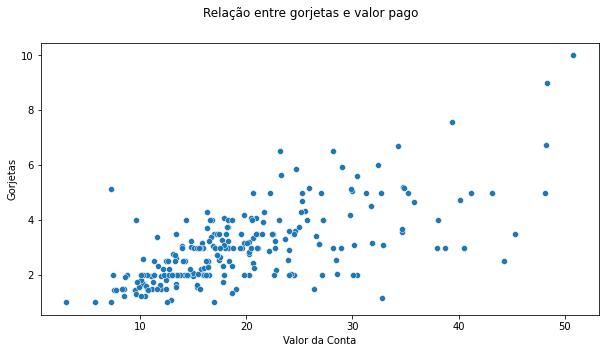

In [67]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
valor_gorjeta.figure.suptitle('Relação entre gorjetas e valor pago')
valor_gorjeta.set(xlabel='Valor da Conta', ylabel='Gorjetas')

Quanto maior é o valor da conta paga, maior é a taxa de gorjeta.

## Quantidade de resultados

In [16]:
gorjetas.count()

valor_da_conta    244
gorjeta           244
sobremesa         244
dia_da_semana     244
horario           244
total_pessoas     244
dtype: int64

In [17]:
print(f"A base de dados contém {gorjetas.shape[0]} casos registrados (corretamente).")

A base de dados contém 244 casos registrados (corretamente).


## Porcentagem

In [18]:
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta).round(2)

In [19]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


### Gráfico I

Text(0.5, 0.98, 'Comparação: Porcentagem e Valor da Conta')

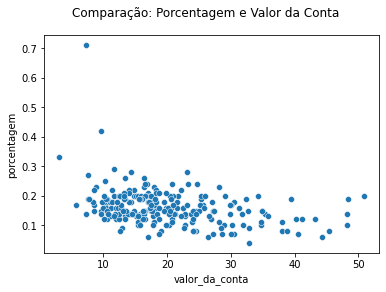

In [61]:
porcentagem_conta = sns.scatterplot(x="valor_da_conta", y="porcentagem", data=gorjetas)
porcentagem_conta.figure.suptitle('Comparação: Porcentagem e Valor da Conta')

Percebe-se que o valor pago não é proporcional a porcentagem, que está relacionando o **valor da conta** e a **gorjeta**.

### Gráfico II

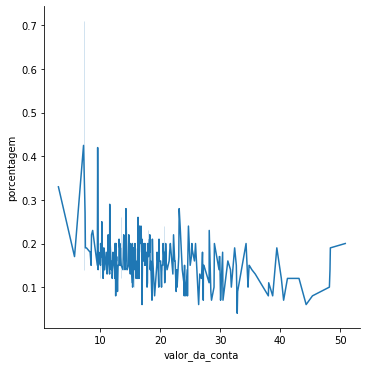

In [68]:
porcentagem_conta2 = sns.relplot(x="valor_da_conta", y="porcentagem", kind="line", data=gorjetas)

### Gráfico III

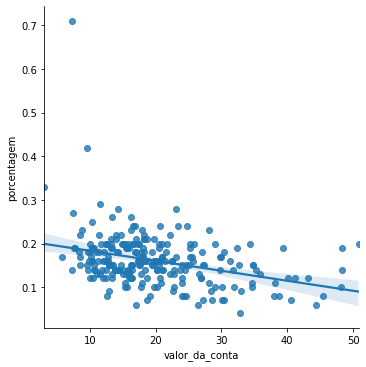

In [69]:
porcentagem_conta3 = sns.lmplot(x="valor_da_conta", y="porcentagem", data=gorjetas)